In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta

# Calculate the start date (one year ago from today)
end_date = datetime.today()
start_date = end_date - timedelta(days=365)

# Fetch Tesla data from Yahoo Finance for the last year
data = yf.download("TSLA", start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'))

# Reset the index to make 'Date' a column
data.reset_index(inplace=True)

# Display the first few rows of the dataset
display(data.head())


[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-06-09,249.070007,252.419998,242.020004,244.399994,244.399994,199882300
1,2023-06-12,247.940002,250.970001,244.589996,249.830002,249.830002,150337900
2,2023-06-13,253.509995,259.679993,251.339996,258.709991,258.709991,162384300
3,2023-06-14,260.170013,261.570007,250.500000,256.790009,256.790009,170575500
4,2023-06-15,248.399994,258.950012,247.289993,255.899994,255.899994,160171200


In [21]:
print(data.isnull().sum());

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


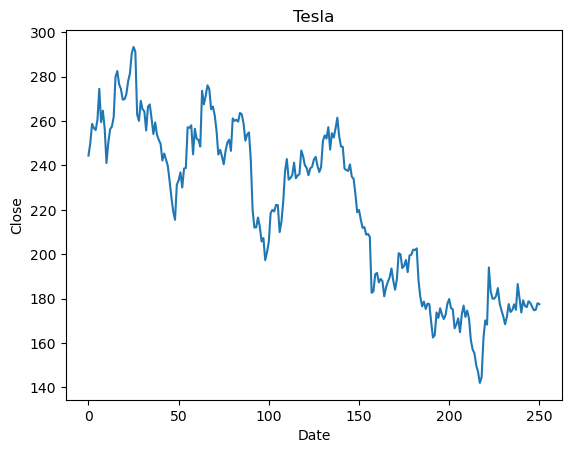

In [22]:
close = data['Close']
ax = close.plot(title='Tesla')
ax.set_xlabel('Date')
ax.set_ylabel('Close')
plt.show()

In [24]:


# Ensure 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format=True)

# Keep only the 'Date' and 'Close' columns for further analysis
data = data[['Date', 'Close']]

# Display the first few rows of the modified dataset
display(data.head())


/var/folders/vt/mmtxz1zx7rzbxz9r9yggb0w40000gn/T/ipykernel_2948/3347660214.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format=True)
/var/folders/vt/mmtxz1zx7rzbxz9r9yggb0w40000gn/T/ipykernel_2948/3347660214.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format=True)


,Date,Close
0,2023-06-09,244.399994
1,2023-06-12,249.830002
2,2023-06-13,258.709991
3,2023-06-14,256.790009
4,2023-06-15,255.899994


02:42:16 - cmdstanpy - INFO - Chain [1] start processing
02:42:16 - cmdstanpy - INFO - Chain [1] done processing


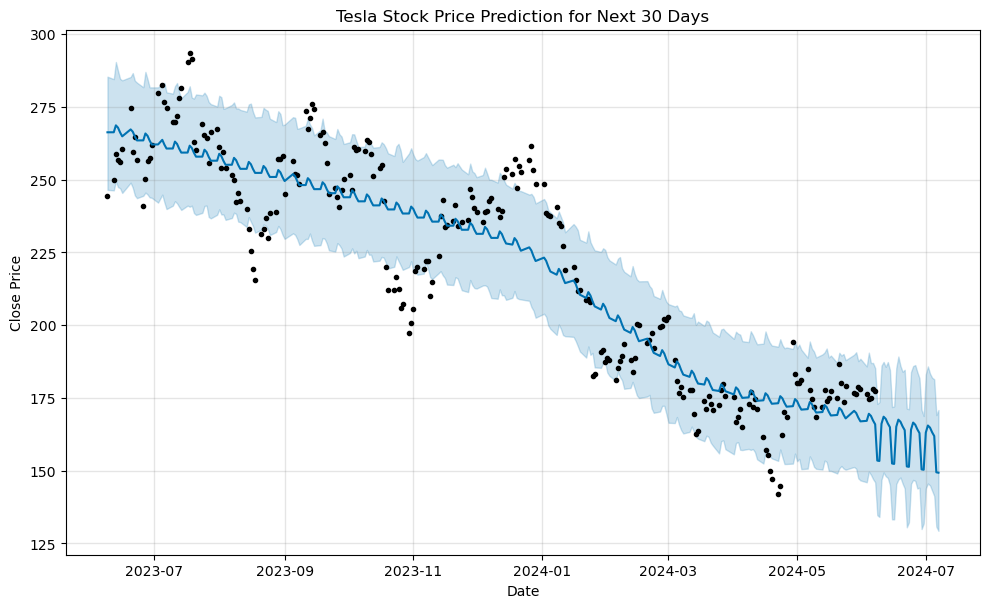

In [28]:
from prophet import Prophet
from datetime import datetime, timedelta
# Rename columns to fit Prophet's expected input format
data.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Initialize the Prophet model
model = Prophet()

# Fit the model to the data
model.fit(data)

# Make a dataframe for future predictions (next 30 days)
future = model.make_future_dataframe(periods=30)

# Predict future values
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title('Tesla Stock Price Prediction for Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()




In [29]:
# Display the forecasted values
display(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30))

,ds,yhat,yhat_lower,yhat_upper
251,2024-06-08,153.467799,134.707101,172.919402
252,2024-06-09,153.323826,134.087755,173.537611
253,2024-06-10,166.107216,146.912174,186.058236
254,2024-06-11,168.536947,149.385862,187.374516
255,2024-06-12,167.800512,148.115498,185.667554
256,2024-06-13,166.205146,147.504649,187.314256
257,2024-06-14,164.923646,145.011453,184.602708
258,2024-06-15,152.459986,133.272436,171.851351
259,2024-06-16,152.316013,133.250804,172.102424
260,2024-06-17,165.099403,145.377837,185.290255


In [ ]:
in conclusion, 